Implementation of these two regularized linear regressions Ridge and Lasso Regression 

#Here i am using Boston Housing Data Set

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge , RidgeCV
from sklearn.linear_model import Lasso , LassoCV

In [ ]:
boston=load_boston()

In [ ]:
boston.data.shape

(506, 13)

Here this datasat is having 13 columns but i am selecting only 7 columns  

In [ ]:
no_of_features=7
X=boston.data[:,:no_of_features]
y=boston.target

In [ ]:
#here i am storing first 7 features names in the varible feature  
features=boston.feature_names[:no_of_features]

In [ ]:
pd.DataFrame(X,columns=features).head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2

In [ ]:
y[0:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

There are 14 attributes in each case of the dataset.But i am taking only first 7 They are:
* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940

#dependent varibale is price , in which the median value of a home is to be predicted

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
#i am scaling all the features 
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)


In [ ]:
X_train_std[0:5]

array([[-0.40155125, -0.4910617 ,  0.10339611, -0.2984635 ,  0.16085075,
        -0.19770443,  0.28147241],
       [-0.39152612, -0.4910617 , -1.04424035, -0.2984635 , -0.37454855,
        -0.99594758,  0.69933163],
       [-0.4019934 ,  0.57450789, -0.92627264, -0.2984635 , -1.0884143 ,
         0.68648097, -1.24831728],
       [-0.38626952, -0.4910617 , -0.6277124 , -0.2984635 , -0.90144946,
        -0.68422489, -1.25539964],
       [-0.36345106, -0.4910617 , -0.19225136, -0.2984635 , -0.0856029 ,
         0.18393737, -0.05493968]])

In [ ]:
alphas=10**np.arange(1,5)
alphas


array([   10,   100,  1000, 10000])

In [ ]:
#loop through different penalty score (alpha) and obtain the estimated cofficient  (weights)

In [ ]:
ridge_weight=[]
for alpha in alphas:
  ridge=Ridge(alpha=alpha,fit_intercept=True)
  ridge.fit(X_train_std,y_train)
  ridge_weight.append(ridge.coef_)

In [ ]:
ridge_weight

[array([-1.49246448,  0.37088936, -0.70836731,  1.08568161, -0.80970633,
         4.4075122 , -0.80450999]),
 array([-1.30486468,  0.5170331 , -0.85951603,  0.96594376, -0.81006847,
         3.54696735, -0.74796938]),
 array([-0.6486645 ,  0.4993468 , -0.67576213,  0.39800779, -0.61503278,
         1.33852138, -0.56022566]),
 array([-0.11842591,  0.11262874, -0.1443168 ,  0.05431575, -0.13553009,
         0.20563081, -0.12574102])]

In [ ]:
def weight_versus_alpha_plot(weight, alphas, features):
    """
    Pass in the estimated weight, the alpha value and the names
    for the features and plot the model's estimated coefficient weight 
    for different alpha values
    """
    fig = plt.figure(figsize = (8, 6))
    
    # ensure that the weight is an array
    weight = np.array(weight)
    for col in range(weight.shape[1]):
      plt.plot(alphas, weight[:, col], label = features[col])

    plt.axhline(0, color = 'black', linestyle = '--', linewidth = 3)
    
    # manually specify the coordinate of the legend
    plt.legend(bbox_to_anchor = (1.3, 0.9))
    plt.title('Coefficient Weight as Alpha Grows')
    plt.ylabel('Coefficient weight')
    plt.xlabel('alpha')
    return fig


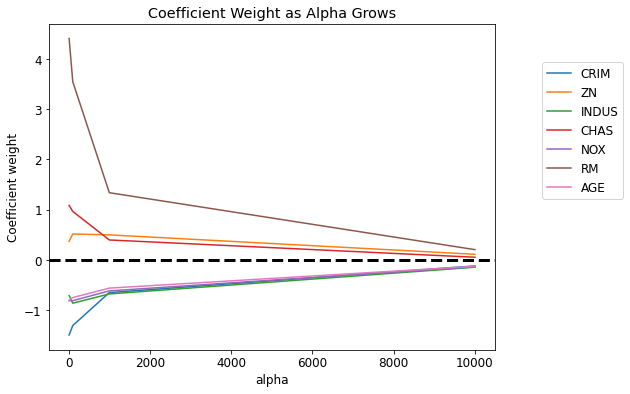

In [ ]:
# change default figure and font size
plt.rcParams['figure.figsize'] = 8, 6 
plt.rcParams['font.size'] = 12
ridge_fig = weight_versus_alpha_plot(ridge_weight, alphas, features)

different alpha values: [0.01, 0.1, 1, 5, 8]


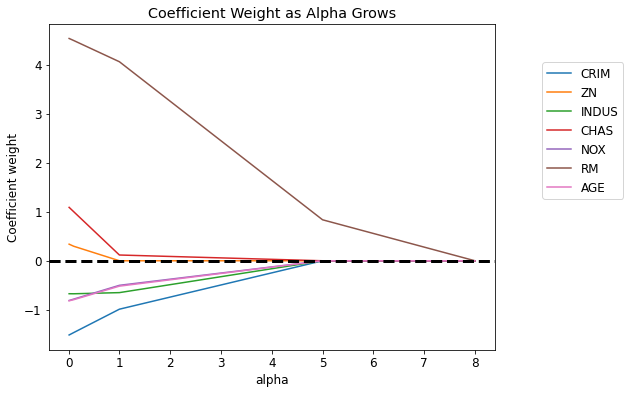

In [ ]:
# does the same thing above except for lasso
alphas = [0.01, 0.1, 1, 5, 8]
print('different alpha values:', alphas)

lasso_weight = []
for alpha in alphas:    
    lasso = Lasso(alpha = alpha, fit_intercept = True)
    lasso.fit(X_train_std, y_train)
    lasso_weight.append(lasso.coef_)

lasso_fig = weight_versus_alpha_plot(lasso_weight, alphas, features)

As we can see that lasso is shrinking the coff. towards to zero almost zero or equal to zero  